In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


En primer lugar se han cargado los datos. Se ha utilizado la selección de nutrientes que se ha utilizado para la clusterización.

In [ ]:

url = 'https://raw.githubusercontent.com/luciapp97/TFM/main/meat_nut.csv'

# Creacion Dataframe
df_food = pd.read_csv(url, sep=';', decimal = '.')

# Visualización del dataframe (la cabecera)

print(df_food.info())

df_food.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fdc_id          852 non-null    int64  
 1   description     852 non-null    object 
 2   is_vegan        852 non-null    bool   
 3   Ca              852 non-null    int64  
 4   CALORIES        852 non-null    int64  
 5   Carbohydrate    852 non-null    float64
 6   Cholesterol     852 non-null    int64  
 7   Dietary  Fiber  852 non-null    float64
 8   FAT             852 non-null    float64
 9   Fat, saturated  852 non-null    float64
 10  Fe              852 non-null    float64
 11  K               852 non-null    int64  
 12  Na              852 non-null    int64  
 13  Protein         852 non-null    float64
 14  Total Trans FA  852 non-null    float64
 15  Vitamin A       852 non-null    int64  
 16  Vitamin C       852 non-null    float64
dtypes: bool(1), float64(8), int64(7), o

,fdc_id,description,is_vegan,Ca,CALORIES,Carbohydrate,Cholesterol,Dietary Fiber,FAT,"Fat, saturated",Fe,K,Na,Protein,Total Trans FA,Vitamin A,Vitamin C
0,344922,GARDENBURGER GB VEGGIE BURGERS BLACK BEAN 3OZ ...,True,59,112,16.90,0,7.4,3.00,0.30,2.70,284,761,10.80,0.1,0,0.0
1,357261,"FIELD ROAST, VEGETARIAN GRAIN MEAT SAUSAGES, M...",True,22,272,13.04,0,4.3,13.04,1.09,1.96,0,565,25.00,0.0,0,0.0
2,386009,"NO BULL BURGER, VEGGIE BURGER, SUNDRIED TOMATO...",True,33,132,23.14,0,5.8,2.07,0.00,2.98,438,372,7.44,0.0,413,4.0
3,390193,"VEGGIE GROUND, VEGAN",True,73,109,9.09,0,3.6,0.91,0.00,4.91,509,491,18.18,0.0,0,0.0
4,390230,"VEGGIE TURKEY, VEGAN",True,0,157,7.84,0,0.0,1.96,0.00,7.06,451,647,23.53,0.0,0,0.0


Como se puede observar, el dataset consta de 752 alimentos cárnicos y 100 veganos.

In [ ]:
df_food["is_vegan"].value_counts()

False    752
True     100
Name: is_vegan, dtype: int64

Dentro del dataset, se tiene un 11,7 % de productos veganos con respecto al total

In [ ]:
df_food["is_vegan"].value_counts()/(len(df_food))

False    0.882629
True     0.117371
Name: is_vegan, dtype: float64

## 1. Preprocesado:



- **Escalar los datos para su uso por el algoritmo.**

En primer lugar, se han escalado los datos ya que había grandes diferencias en los valores.

In [ ]:
df_food2 = df_food.drop(["description","fdc_id","is_vegan"], axis = 1)

scaler = StandardScaler()
scaled = scaler.fit(df_food2).transform(df_food2)

In [ ]:
df_food3 = pd.DataFrame(scaled, columns= df_food2.columns)



df_food3 = pd.concat([df_food3, df_food["is_vegan"]], axis=1)
df_food3.head()

df_food3.head()

,Ca,CALORIES,Carbohydrate,Cholesterol,Dietary Fiber,FAT,"Fat, saturated",Fe,K,Na,Protein,Total Trans FA,Vitamin A,Vitamin C,is_vegan
0,0.773441,-0.978926,1.472339,-1.709537,3.377798,-1.004493,-1.026478,-0.046200,1.292033,0.402091,-1.142425,0.129133,-0.166494,-0.249061,True
1,-0.112982,0.466168,0.988001,-1.709537,1.772067,-0.120198,-0.852791,-0.047913,-0.576751,0.021205,1.340133,-0.280783,-0.166494,-0.249061,True
2,0.150549,-0.798289,2.255309,-1.709537,2.549034,-1.086404,-1.092435,-0.045552,2.305388,-0.353851,-1.729847,-0.280783,0.337015,1.326583,True
3,1.108844,-1.006021,0.492371,-1.709537,1.409483,-1.188574,-1.092435,-0.041085,2.772584,-0.122599,0.147806,-0.280783,-0.166494,-0.249061,True
4,-0.640044,-0.572493,0.335526,-1.709537,-0.455237,-1.096093,-1.092435,-0.036109,2.390931,0.180555,1.083136,-0.280783,-0.166494,-0.249061,True


Se ha eliminado la columna food id ya que se trata de un identificador único que no tiene sentido utilizar para predecir.

**Convertir todas las variables categóricas a numéricas (is_vegan)**

Vemos como todas las variables son numéricas a excepción de la columna de categoría Vegana o no.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_food['is_vegan'])
df_food3['is_vegan'] = le.transform(df_food3['is_vegan'])

In [ ]:
df_food3.head()

,Ca,CALORIES,Carbohydrate,Cholesterol,Dietary Fiber,FAT,"Fat, saturated",Fe,K,Na,Protein,Total Trans FA,Vitamin A,Vitamin C,is_vegan
0,0.773441,-0.978926,1.472339,-1.709537,3.377798,-1.004493,-1.026478,-0.046200,1.292033,0.402091,-1.142425,0.129133,-0.166494,-0.249061,1
1,-0.112982,0.466168,0.988001,-1.709537,1.772067,-0.120198,-0.852791,-0.047913,-0.576751,0.021205,1.340133,-0.280783,-0.166494,-0.249061,1
2,0.150549,-0.798289,2.255309,-1.709537,2.549034,-1.086404,-1.092435,-0.045552,2.305388,-0.353851,-1.729847,-0.280783,0.337015,1.326583,1
3,1.108844,-1.006021,0.492371,-1.709537,1.409483,-1.188574,-1.092435,-0.041085,2.772584,-0.122599,0.147806,-0.280783,-0.166494,-0.249061,1
4,-0.640044,-0.572493,0.335526,-1.709537,-0.455237,-1.096093,-1.092435,-0.036109,2.390931,0.180555,1.083136,-0.280783,-0.166494,-0.249061,1


## 2. Generar un modelo con el algoritmo de KNN. 

In [ ]:
X = df_food3.iloc[:,0:-1]
Y = df_food3.iloc[:,-1]

En primer lugar, se va a buscar la K para la cual el desempeño del modelo es el mejor. Para el modelo se va a utilizar un método de distancia para los pesos en el cual todos los vecinos van cercanos pesan más. 

En cuanto a la métrica de la distancia, se va a dejar la métrica por defecto, minkoski. 

In [ ]:
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski") # uniform’, ‘distance’
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

  df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

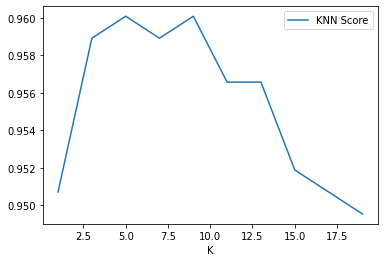

In [ ]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show()

Se observa como a partir de 9 vecinos el valor del score empieza a disminuir, y por tanto, teniendo en cuanto que un número grande de vecinos tendrá un coste computacional, no se van a  seleccionar valores superiores. Se va a fijar el valor de vecinos a **7**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42, test_size=0.2)

knn_model = KNeighborsClassifier(n_neighbors=9, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)


# 3. Evaluación del modelo

Tras entrenar el modelo se va a proceder a evaluarlo.

## **Calcula el Accuracy**

In [ ]:
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*knn_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*knn_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 98.09
Precisión sobre los datos de test: 97.66


Se observa como la precisión del modelo, aunque ligeramente inferior en los datos de test, es buena en los datos de entrenamiento y en los datos de test, con poca variación (98.1% vs 97.7%) lo que indica que no se ha producido un sobreajuste.

## **Grafica la ROC-Curve.**




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


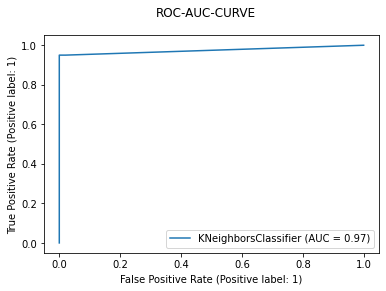

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=7, weights="uniform", metric="minkowski")
knn_model.fit(X_train, y_train)
plot_roc_curve(knn_model, X_test, y_test)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

El area bajo la curva del modelo es de 0.97, hay una probabilidad alta de que el clasificador distinga los valores positivos de los negativos.



## **Confusion-Matrix.**

Además de conocer la accuracy del grupo de test, en este caso, es interesante explorar como se han distribuido las clasificaciones de los grupos vegano y no-vegano.

Confusion matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


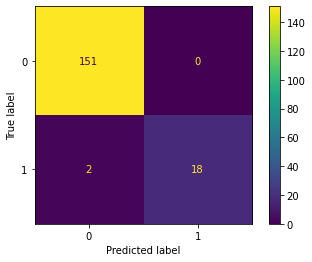

In [ ]:
confusion_matrix(y_test, pred_test)

print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(knn_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

Vemos como el modelo no ha clasificado correctamante le clase vegana en todos los casos casos, mientras que los productos cárnicos han sido categorizados correctamente en todos los casos.

Se va a explorar que productos ha categorizado de forma erronea. 

In [ ]:
error_pred = X_test

In [ ]:
error_pred["predic"] = knn_model.predict(X_test)


In [ ]:
error_pred["label"] = y_test

In [ ]:
error_pred2 = error_pred.query("label != predic")

Se observan a continuación los productos veganos que han sido interpretados como cárnicos en base a su composición nutricional.

In [ ]:
df_food.iloc[error_pred2.index]

,fdc_id,description,is_vegan,Ca,CALORIES,Carbohydrate,Cholesterol,Dietary Fiber,FAT,"Fat, saturated",Fe,K,Na,Protein,Total Trans FA,Vitamin A,Vitamin C
807,1032377,GOLDEN FISHLESS FILETS,True,42,198,12.5,0,2.1,12.5,1.04,1.67,271,375,8.33,0.0,0,0.0
46,751794,Morningstar Farms Hot Dogs 8.4oz,True,19,126,11.2,0,2.3,1.3,0.20,1.20,37,1076,17.40,0.0,102,0.0


Finalmente, se van a observar las métricas de clasificación del algoritmo.

In [ ]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, knn_model.predict(X_test))}")

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       151
           1       1.00      0.90      0.95        20

    accuracy                           0.99       171
   macro avg       0.99      0.95      0.97       171
weighted avg       0.99      0.99      0.99       171

